# Predict new locations for UBS wealth management branch offices.

Union Bank of Switzerland (UBS) is looking to apply Machine Learning in predicting most likely new locations/zipcodes be opened with UBS wealth management branches in the USA

### keywords: data cleaning, feature selection, under-sampling, cross-validation, cross-prediction, LogisticRegression, Naive Bayes, KNN, ensemble learning 

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import random
import copy
from sklearn.model_selection import KFold, cross_val_score,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# Data cleaning

In [2]:
#Import original dataset
original_dataset=pd.read_csv('UBS_original_data.csv')
dataset=copy.deepcopy(original_dataset)
dataset.head()

,ZipCode,Population,HouseholdsPerZipCode,WhitePopulation,BlackPopulation,HispanicPopulation,AsianPopulation,HawaiianPopulation,IndianPopulation,OtherPopulation,...,DeliveryTotal,PopulationEstimate,LandArea,WaterArea,BoxCount,SFDU,MFDU,CityDeliveryIndicator,MedicareCBSAType,MarketRatingAreaID
0,501,0,0,0,0,0,0,0,0,0,...,1,0,0.000,0.000,0,0,0,N,Metro,8
1,501,0,0,0,0,0,0,0,0,0,...,1,0,0.000,0.000,0,0,0,N,Metro,8
2,544,0,0,0,0,0,0,0,0,0,...,0,0,0.000,0.000,0,0,0,N,Metro,8
3,544,0,0,0,0,0,0,0,0,0,...,0,0,0.000,0.000,0,0,0,N,Metro,8
4,601,18570,6525,17479,663,18486,7,10,113,558,...,5074,11342,64.348,0.309,831,2376,1206,Y,Micro,1


In [3]:
#Remove the rows where the population are 0
dataset = dataset[dataset.Population != 0]
dataset.head()

,ZipCode,Population,HouseholdsPerZipCode,WhitePopulation,BlackPopulation,HispanicPopulation,AsianPopulation,HawaiianPopulation,IndianPopulation,OtherPopulation,...,DeliveryTotal,PopulationEstimate,LandArea,WaterArea,BoxCount,SFDU,MFDU,CityDeliveryIndicator,MedicareCBSAType,MarketRatingAreaID
4,601,18570,6525,17479,663,18486,7,10,113,558,...,5074,11342,64.348,0.309,831,2376,1206,Y,Micro,1
5,601,18570,6525,17479,663,18486,7,10,113,558,...,5074,11342,64.348,0.309,831,2376,1206,Y,Micro,1
6,601,18570,6525,17479,663,18486,7,10,113,558,...,5074,11342,64.348,0.309,831,2376,1206,Y,Micro,1
7,601,18570,6525,17479,663,18486,7,10,113,558,...,5074,11342,64.348,0.309,831,2376,1206,Y,Micro,1
8,602,41520,15002,36828,2860,41265,42,32,291,2634,...,11165,24000,30.613,1.717,1502,5420,821,Y,Metro,1


In [4]:
#Reset the row index for later use
dataset.index=range(len(dataset))
#Replace the empty cell with the NaN
for j in range(dataset.columns.size):
    dataset.iloc[:,j].replace(r'\s+', np.nan, regex=True, inplace=True)

In [5]:
#Checking for missing values(NaN) in each feature
feature_nan_value=dataset.isnull().sum()
print(feature_nan_value)

ZipCode                            0
Population                         0
HouseholdsPerZipCode               0
WhitePopulation                    0
BlackPopulation                    0
HispanicPopulation                 0
AsianPopulation                    0
HawaiianPopulation                 0
IndianPopulation                   0
OtherPopulation                    0
MalePopulation                     0
FemalePopulation                   0
PersonsPerHousehold                0
AverageHouseValue                  0
IncomePerHousehold                 0
MedianAge                          0
MedianAgeMale                      0
MedianAgeFemale                    0
CityType                           0
NumberOfBusinesses                 0
NumberOfEmployees                  0
BusinessFirstQuarterPayroll        0
BusinessAnnualPayroll              0
BusinessEmploymentFlag         62853
GrowthRank                         0
GrowingCountiesA                   0
GrowingCountiesB                   0
G

In [6]:
#Drop those features with over 50% of the values being NaN 
dataset.drop(['BusinessEmploymentFlag'],axis=1,inplace=True)

In [7]:
#Fill the nan with its next value for the feature "MedicareCBSAType" 
dataset.MedicareCBSAType.fillna(method='bfill',inplace=True)

In [8]:
#Encode categorical features with dummy variables
dataset=pd.get_dummies(dataset)  

In [9]:
#Group by zip code, and select max value of each group
dataset=dataset.groupby('ZipCode',as_index=False).max()

In [10]:
#Input label/target data
#the zipcodes already opened with branches are labeled with "1", otherwise "0"
dataset_label=pd.read_csv('UBS_data_label.csv')
dataset_label.head()

,ZipCode,UBS_Open_Branch
0,1144,1
1,1608,1
2,1945,1
3,1960,1
4,2109,1


In [11]:
#Final clean data with the label
#Final_dataset=pd.merge(dataset,dataset_label.drop(['UBS_Branches'],axis=1), on='ZipCode',how='left')
Final_dataset=pd.merge(dataset,dataset_label, on='ZipCode',how='left')
Final_dataset.UBS_Open_Branch.fillna(0,inplace=True)
Final_dataset.to_csv('UBS_clean_data.csv',index=False)

In [12]:
# Import clean dataset
original_dataset = pd.read_csv('UBS_clean_data.csv')
original_dataset.head()

,ZipCode,Population,HouseholdsPerZipCode,WhitePopulation,BlackPopulation,HispanicPopulation,AsianPopulation,HawaiianPopulation,IndianPopulation,OtherPopulation,...,CityType_C,CityType_N,CityType_P,CityType_U,CityType_Z,CityDeliveryIndicator_N,CityDeliveryIndicator_Y,MedicareCBSAType_Metro,MedicareCBSAType_Micro,UBS_Open_Branch
0,601,18570,6525,17479,663,18486,7,10,113,558,...,0,0,1,1,0,0,1,0,1,0.0
1,602,41520,15002,36828,2860,41265,42,32,291,2634,...,0,0,1,1,0,0,1,1,0,0.0
2,603,54689,21161,46501,5042,53877,135,35,313,4177,...,0,1,1,1,0,0,1,1,0,0.0
3,606,6615,2404,5979,371,6575,3,9,35,323,...,0,0,1,1,0,0,1,0,1,0.0
4,610,29016,10836,24510,2654,28789,57,31,200,2494,...,0,0,1,1,0,0,1,1,0,0.0


## Feature selection

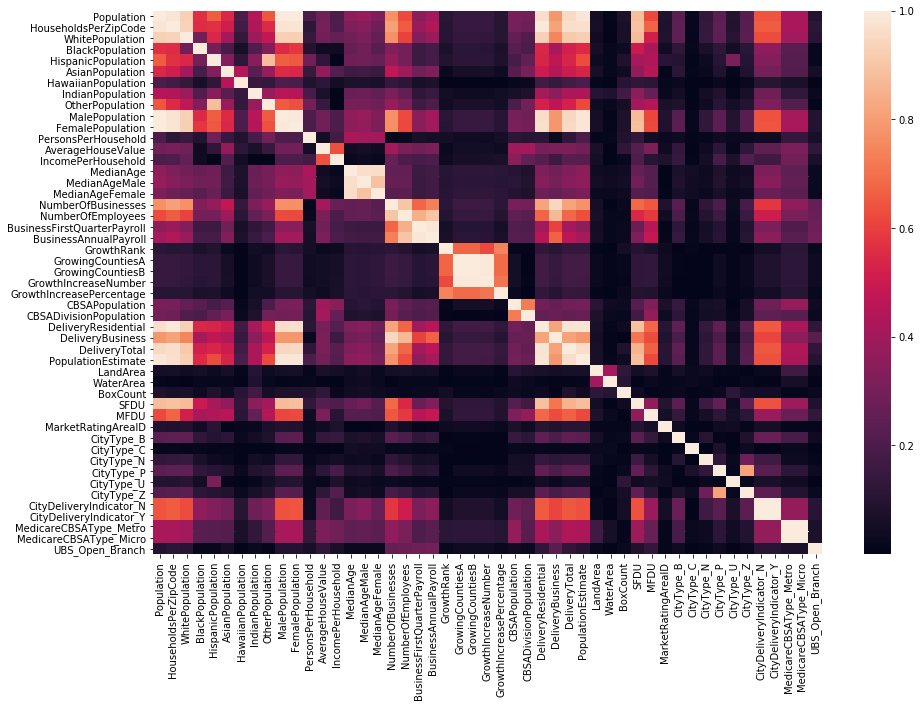

In [13]:
#Calculate the correlation of all features and label
cor=original_dataset.drop(['ZipCode'],axis=1).corr().abs()

%matplotlib inline

plt.figure(figsize=(15, 10))
sns.heatmap(cor, 
            xticklabels=cor.columns.values,
            yticklabels=cor.columns.values)
plt.show()

In [14]:
#Only consider the correlation of each feature to the target/label
cor_target = cor["UBS_Open_Branch"]
cor_target =cor_target [cor_target <1]

#Only choose those futures with larger correlation to the target/label  
best_features = cor_target [cor_target > 0.09]
best_features

Population                     0.090477
HouseholdsPerZipCode           0.112171
WhitePopulation                0.107347
MalePopulation                 0.090559
FemalePopulation               0.090176
AverageHouseValue              0.121534
NumberOfBusinesses             0.264205
NumberOfEmployees              0.271762
BusinessFirstQuarterPayroll    0.284221
BusinessAnnualPayroll          0.293810
DeliveryResidential            0.122973
DeliveryBusiness               0.228734
DeliveryTotal                  0.127148
PopulationEstimate             0.097222
MFDU                           0.131666
CityDeliveryIndicator_N        0.107371
CityDeliveryIndicator_Y        0.107371
Name: UBS_Open_Branch, dtype: float64

In [15]:
#Obtain the filtered feature dataset
original_dataset_features = original_dataset.drop(['ZipCode','UBS_Open_Branch'],axis=1)
CorrFilter_dataset_features=original_dataset_features[list(best_features.index)]

In [16]:
#Add label and zip code index
CorrFilter_dataset=CorrFilter_dataset_features
CorrFilter_dataset['UBS_Open_Branch']=original_dataset['UBS_Open_Branch']
CorrFilter_dataset['ZipCode']=original_dataset['ZipCode']
#Add prediction coloumn
CorrFilter_dataset['y_pred_prob']=0.0

C:\Users\yiche\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\yiche\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\yiche\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [17]:
#Number of records in class 0 and class 1
print('The size of class 1: {}'.format(len(CorrFilter_dataset[CorrFilter_dataset.UBS_Open_Branch == 0])))
print('The size of class 0: {}'.format(len(CorrFilter_dataset[CorrFilter_dataset.UBS_Open_Branch != 0]))) 

The size of class 1: 32695
The size of class 0: 264


## Binary classification problem on a highly imbalanced dataset

In [18]:
# Minority dataset
minority_dataset=CorrFilter_dataset[CorrFilter_dataset.UBS_Open_Branch != 0]

# Majority dataset
majority_dataset = CorrFilter_dataset[CorrFilter_dataset.UBS_Open_Branch == 0]

In [19]:
#Shuffle the indeces of Majority dataset
majority_index=list(majority_dataset.index)
random.seed(2337)
random.shuffle(majority_index)

## Undersampling & cross-prediction 

For this specific problem, the information of zipcodes in majority class are requied for model training, on the other hand, any zipcode in majority class is possbile to be opened with a new branch.
Therefore, regular model training and prediction process lead to "data leakage", which refers to a mistake made by the creator of a machine learning model, in which they accidentally share information between the test and training data-sets, memorizes the training set data, and is easily able to correctly output the labels/values for those test data-set examples.
In order to avoid "data leakage", we employ an undersampling & cross-prediction scheme.

Divide the majority dataset into m=122 subsets, each subset size is n=268, we randomly select one subset of majority dataset, and combine it with the minority set as a train set to train the model with cross-validation, the cross-validation score is recored as the weight which is used in the final stage. 
Keep the remaining part of the majority dataset as the test set, predict the test set with the trained model.
<img src="cross_prediction2-1.png">
Repeat above process until all the m=122 subsets of majority dataset have been employed for model training. 
Finally calculate the weighted average of the predictions for each zipcode, 
those zipcodes with the top predictions are the ones to be opend wth the new branches most likely.

In [20]:
#Parameters initialization

#Divied the majority set into subset
number_subsets=122

#Size of each subset in majority set
subsetsize=268

#Indeces of elements in each subset of majority set
majority_subset_index=[]

#Cross-validation score initialization
Model_performance=pd.DataFrame(np.zeros((122,1)),columns=['Accuracy'])

#Obtain indeces of elements in each subset of majority set
for i in range(122):
    majority_subset_index.append(majority_index[i*subsetsize:(i+1)*subsetsize])
    
#Initialize the final weighted prediction of each zipcode
Final_All_ZipCode_prediction=CorrFilter_dataset.loc[:,['ZipCode','y_pred_prob']]

#Initialize the prediction of each zipcode in a single round cross-prediction
temp_single_round_prediction=CorrFilter_dataset.loc[:,['ZipCode','y_pred_prob']] 

## Ensemble learning: model stacking
<img src="model_stacking-1.png">

In [21]:
#Classification model stacking

#Logistic regression
logreg= LogisticRegression(random_state=10,solver='liblinear')#random_state=10

#Naive bayes
NB = GaussianNB()

#KNN
KNN = KNeighborsClassifier(n_neighbors =15, metric = 'minkowski', p = 2)

In [22]:
#Cross prediction

#Train model with K-Fold cross validation
kf = KFold(n_splits=10,random_state=10)
for j in range(number_subsets):
    
    #A subset of majoriry data set is combined with the minority set to form the train set
    majority_datasubset=majority_dataset.loc[majority_subset_index[j],:]
    dataset_train=majority_datasubset.append(minority_dataset,ignore_index=False)    
    X_train= dataset_train.iloc[:,1:-3].values ##features
    y_train = dataset_train.UBS_Open_Branch.values##labels
      
    
    #Train models using KFold cv
    #logit_score =cross_val_score(logreg, X_train, y_train, cv=kf,scoring='accuracy')
    #NB_score = cross_val_score(NB, X_train, y_train, cv=kf,scoring='accuracy')
    logit_score = cross_validate(logreg, X_train, y_train,  scoring='accuracy', cv=kf,return_train_score=True)
    NB_score=cross_validate(NB, X_train, y_train,  scoring='accuracy', cv=kf,return_train_score=True)
    #tree_score=cross_validate(tree, X_train, y_train,  scoring='accuracy', cv=kf,return_train_score=True)
    KNN_score=cross_validate(KNN, X_train, y_train,  scoring='accuracy', cv=kf,return_train_score=True)
    
    #Select the average accuracy score of different models
    #cross_validation_score = (np.mean(NB_score['test_score'])+np.mean(logit_score['test_score'])+np.mean(KNN_score['test_score']))/3
    
    #Predict the test set
    #The remaining part of the majority dataset which is not used in training process
    #is the test set   
    X_test=majority_dataset.drop(majority_subset_index[j],axis=0).iloc[:,1:-3].values
    X_test_ZipCode=majority_dataset.drop(majority_subset_index[j],axis=0).loc[:,['ZipCode','y_pred_prob']]
     

    #Predict the test set with different models   
    NB.fit(X_train, y_train)           
    y_probas_NB= NB.predict_proba(X_test)

    logreg.fit(X_train, y_train) 
    y_probas_logit= logreg.predict_proba(X_test)
    
    
    KNN.fit(X_train, y_train) 
    y_probas_KNN= KNN.predict_proba(X_test)
    
    # Get the weighted predicted probability of text set with different models
    y_probas=y_probas_NB*np.mean(NB_score['test_score'])+y_probas_logit*np.mean(logit_score['test_score'])+y_probas_KNN*np.mean(KNN_score['test_score'])
    
    X_test_ZipCode['y_pred_prob']=y_probas[:,1]
    
    #Merge the predictions on Zipcode
    single_round_predictions=pd.merge(temp_single_round_prediction,X_test_ZipCode, on='ZipCode',how='left')
    
    #Replace nan with 0
    single_round_predictions.iloc[:,-1].fillna(0,inplace=True)
    
    
    #Weighted averaging the prediction probability with the 
    #Cross validation score from each model
    Final_All_ZipCode_prediction['y_pred_prob']+=single_round_predictions.iloc[:,-1]#*cross_validation_score 
    #Model_performance.iloc[j,:]=cross_validation_score
    print('CV for {}-th subset using LogRg: train_score mean is {}, test_score mean is {}'.format(j+1,np.round(np.mean(logit_score['train_score']),decimals=4),np.round(np.mean(logit_score['test_score']),decimals=4)))
    print('CV for {}-th subset using    NB: train_score mean is {}, test_score mean is {}'.format(j+1,np.round(np.mean(NB_score['train_score']),decimals=4),np.round(np.mean(NB_score['test_score']),decimals=4)))
    #print('Cross-validation for {}-th subset using tree: train_score mean is {}, test_score mean is {}'.format(j,np.mean(tree_score['train_score']),np.mean(tree_score['test_score'])))
    print('CV for {}-th subset using   KNN: train_score mean is {}, test_score mean is {} \n'.format(j+1,np.round(np.mean(KNN_score['train_score']),decimals=4),np.round(np.mean(KNN_score['test_score']),decimals=4)))

CV for 1-th subset using LogRg: train_score mean is 0.8893, test_score mean is 0.8497
CV for 1-th subset using    NB: train_score mean is 0.8398, test_score mean is 0.8288
CV for 1-th subset using   KNN: train_score mean is 0.9079, test_score mean is 0.8835 

CV for 2-th subset using LogRg: train_score mean is 0.8937, test_score mean is 0.8439
CV for 2-th subset using    NB: train_score mean is 0.8578, test_score mean is 0.8552
CV for 2-th subset using   KNN: train_score mean is 0.906, test_score mean is 0.8704 

CV for 3-th subset using LogRg: train_score mean is 0.8761, test_score mean is 0.8231
CV for 3-th subset using    NB: train_score mean is 0.8225, test_score mean is 0.8138
CV for 3-th subset using   KNN: train_score mean is 0.897, test_score mean is 0.8648 

CV for 4-th subset using LogRg: train_score mean is 0.8866, test_score mean is 0.8421
CV for 4-th subset using    NB: train_score mean is 0.8436, test_score mean is 0.8401
CV for 4-th subset using   KNN: train_score mean i

CV for 33-th subset using LogRg: train_score mean is 0.9079, test_score mean is 0.872
CV for 33-th subset using    NB: train_score mean is 0.8523, test_score mean is 0.8476
CV for 33-th subset using   KNN: train_score mean is 0.8968, test_score mean is 0.8628 

CV for 34-th subset using LogRg: train_score mean is 0.8993, test_score mean is 0.8533
CV for 34-th subset using    NB: train_score mean is 0.8578, test_score mean is 0.8496
CV for 34-th subset using   KNN: train_score mean is 0.9165, test_score mean is 0.9024 

CV for 35-th subset using LogRg: train_score mean is 0.8979, test_score mean is 0.8495
CV for 35-th subset using    NB: train_score mean is 0.8292, test_score mean is 0.8213
CV for 35-th subset using   KNN: train_score mean is 0.9025, test_score mean is 0.8778 

CV for 36-th subset using LogRg: train_score mean is 0.9014, test_score mean is 0.8628
CV for 36-th subset using    NB: train_score mean is 0.8682, test_score mean is 0.8627
CV for 36-th subset using   KNN: train

CV for 65-th subset using LogRg: train_score mean is 0.8835, test_score mean is 0.8385
CV for 65-th subset using    NB: train_score mean is 0.8517, test_score mean is 0.8497
CV for 65-th subset using   KNN: train_score mean is 0.9052, test_score mean is 0.8761 

CV for 66-th subset using LogRg: train_score mean is 0.9033, test_score mean is 0.8459
CV for 66-th subset using    NB: train_score mean is 0.8175, test_score mean is 0.8118
CV for 66-th subset using   KNN: train_score mean is 0.9031, test_score mean is 0.863 

CV for 67-th subset using LogRg: train_score mean is 0.906, test_score mean is 0.8723
CV for 67-th subset using    NB: train_score mean is 0.877, test_score mean is 0.8759
CV for 67-th subset using   KNN: train_score mean is 0.9156, test_score mean is 0.8892 

CV for 68-th subset using LogRg: train_score mean is 0.8975, test_score mean is 0.8438
CV for 68-th subset using    NB: train_score mean is 0.8567, test_score mean is 0.8475
CV for 68-th subset using   KNN: train_s

CV for 97-th subset using LogRg: train_score mean is 0.8828, test_score mean is 0.8456
CV for 97-th subset using    NB: train_score mean is 0.8208, test_score mean is 0.8137
CV for 97-th subset using   KNN: train_score mean is 0.8985, test_score mean is 0.8722 

CV for 98-th subset using LogRg: train_score mean is 0.9048, test_score mean is 0.8741
CV for 98-th subset using    NB: train_score mean is 0.8914, test_score mean is 0.8871
CV for 98-th subset using   KNN: train_score mean is 0.9185, test_score mean is 0.8853 

CV for 99-th subset using LogRg: train_score mean is 0.8897, test_score mean is 0.8555
CV for 99-th subset using    NB: train_score mean is 0.8488, test_score mean is 0.8364
CV for 99-th subset using   KNN: train_score mean is 0.9114, test_score mean is 0.8892 

CV for 100-th subset using LogRg: train_score mean is 0.8855, test_score mean is 0.8307
CV for 100-th subset using    NB: train_score mean is 0.8312, test_score mean is 0.8286
CV for 100-th subset using   KNN: t

In [23]:
#Rank the predicted probability
Final_All_ZipCode_prediction.sort_values('y_pred_prob',inplace=True,ascending=False)
Final_All_ZipCode_prediction['y_pred_prob']=Final_All_ZipCode_prediction['y_pred_prob']#/Model_performance.iloc[:,0].sum()
print(Final_All_ZipCode_prediction.head(20).to_string(index=False))

ZipCode  y_pred_prob
  10017   308.657482
  98101   308.436541
  60601   308.365649
  92121   308.362137
  10018   308.329001
  94043   308.297936
  90245   308.294006
  10016   308.228265
  95054   308.201669
  10010   308.163480
  22102   308.158248
  30339   308.112345
  10001   308.104076
  80112   308.070899
  94111   308.067026
  94107   307.987709
   2110   307.970819
   2210   307.968246
  95134   307.931901
  10003   307.924068
